# 5주차 주간 시험(quiz 04)_제출용

In [2]:
import numpy as np 
import platform
import matplotlib.pyplot as plt
import pandas as pd 
import time
import datetime

from matplotlib import font_manager, rc
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [3]:
# pd.options.mode.chained_assignment = None

In [4]:
# 한글 설정
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Set Hangul of Darwin")
    rc("font", family="Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Set Hangul of Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    
else:
    print("Unknown system. Error Hangul")
    
plt.rcParams["axes.unicode_minus"] = False

Set Hangul of Windows


---

# 문제 1번
- 어떤경로든covid-19의데이터를얻으세요.가급적2020년1~2월부터최소600일
이상의데이터면좋겠습니다.

In [5]:
# 국가별 코로나 확진자 수 데이터
# 시작일 : 2020년 1월 22일
# 최근 갱신일 : 2021년 10월 11일 ...(갱신 예정 데이터)
confirmed_df = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# 국가별 코로나 사망자 수 데이터
# 시작일 : 2020년 1월 22일
# 최근 갱신일 : 2021년 10월 11일 ...(갱신 예정 데이터)
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
# 일자, 국가별 코로나 확진자수 테이블
confirmed_df.tail(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,209199,209248,209283,209315,209336,209347,209353,209396,209411,209431
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,131205,131434,131523,131705,131762,131796,131875,132016,132108,132251


In [7]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,209199,209248,209283,209315,209336,209347,209353,209396,209411,209431


In [8]:
# 일자, 국가별 코로나 사망자수 테이블
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7214,7220,7221,7221,7221,7225,7228,7230,7234,7238
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2725,2734,2746,2753,2759,2768,2777,2783,2788,2797
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5831,5838,5843,5846,5850,5853,5855,5859,5862,5864
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1587,1598,1603,1613,1618,1622,1629,1642,1650,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,19979,20098,20223,20337,20442,20555,20670,20763,20869,20950
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4170,4438,4456,4465,4465,4465,4504,4521,4532,4547
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1748,1763,1765,1773,1775,1778,1782,1787,1789,1793
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3650,3652,3653,3653,3653,3654,3654,3654,3657,3657


In [116]:
print("전체 국가 수 : {}".format( len(list(confirmed_df["Country/Region"].unique()))))
print("전체 데이터 일 수 : {}".format(len(list(confirmed_df.columns)) - 4))

전체 국가 수 : 195
전체 데이터 일 수 : 630


In [117]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 634 entries, Province/State to 10/12/21
dtypes: float64(2), int64(630), object(2)
memory usage: 1.3+ MB


In [118]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 634 entries, Province/State to 10/12/21
dtypes: float64(2), int64(630), object(2)
memory usage: 1.3+ MB


---

# 문제 2번
- 우리는전세계의데이터를사용하지않을려고합니다.애초목적에비춰우리와비슷한 수준혹은이이상의경제력을가진나라들을가지고다시데이터를구성해야하는것이 타당해보입니다.
- 예를들어누구나선진국으로인정하는미국,영국,프랑스,이탈리아,이스라엘,일본 등등의나라가될것입니다.어쩌면여러분들은G20국가를선택해도되지않을까합니다.단자신들의확진자수를공개하고있는나라중에서선택하면될것입니다.
- 여러분들이직접우리나라와비교할4개국가를선택해주세요.(단중국은여러이슈가 있어서데이터수집에서제외해주세요)
- 그래서우리나라와선택된4개국가,합쳐서5개의국가를앞으로는“전체데이터”라고하겠습니다.

In [9]:
# 한국 : Korea, South
# 미국 : US
# 이탈리아 : Italy
# 독일 : Germany
# 일본 : Japan

In [10]:
confirmed_df_5 = confirmed_df.copy()[ 
    (confirmed_df["Country/Region"] == "Korea, South") | 
    (confirmed_df["Country/Region"] == "US") |
    (confirmed_df["Country/Region"] == "Italy") |
    (confirmed_df["Country/Region"] == "Germany") |
    (confirmed_df["Country/Region"] == "Japan")
]
confirmed_df_5["Section"] = "Confirmed"

In [11]:
confirmed_df_5

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,Section
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,4284400,4295876,4305634,4312528,4318437,4323346,4331274,4343591,4355169,Confirmed
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4689341,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,Confirmed
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1708634,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,Confirmed
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,325804,327976,329925,331519,332816,334163,335742,337679,339361,Confirmed
254,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,44058827,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,Confirmed


In [12]:
deaths_df_5 = deaths_df.copy()[ 
    (confirmed_df["Country/Region"] == "Korea, South") | 
    (confirmed_df["Country/Region"] == "US") |
    (confirmed_df["Country/Region"] == "Italy") |
    (confirmed_df["Country/Region"] == "Germany") |
    (confirmed_df["Country/Region"] == "Japan")
]
deaths_df_5["Section"] = "Deaths"

In [13]:
deaths_df_5

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,Section
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,94031,94117,94182,94206,94213,94308,94393,94407,94530,Deaths
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,131157,131198,131228,131274,131301,131335,131384,131421,131461,Deaths
155,NaN,Japan,36.204824,138.252924,0,0,0,0,0,0,...,17833,17872,17918,17945,17952,17972,17999,18032,18063,Deaths
160,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,2544,2554,2560,2575,2583,2594,2605,2618,2626,Deaths
254,NaN,US,40.000000,-100.000000,0,0,0,0,0,0,...,708110,710502,712339,712618,712873,714055,716471,719558,721563,Deaths


In [14]:
# 한국, 미국, 이탈리아, 독일, 일본 
# 코로나 확진자, 사망자수 데이터프레임

df_all_data = pd.concat([confirmed_df_5, deaths_df_5])
df_all_data.reset_index(inplace=True, drop=True)
df_all_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,Section
0,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,4284400,4295876,4305634,4312528,4318437,4323346,4331274,4343591,4355169,Confirmed
1,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4689341,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,Confirmed
2,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1708634,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,Confirmed
3,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,325804,327976,329925,331519,332816,334163,335742,337679,339361,Confirmed
4,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,44058827,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,Confirmed
5,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,94031,94117,94182,94206,94213,94308,94393,94407,94530,Deaths
6,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,131157,131198,131228,131274,131301,131335,131384,131421,131461,Deaths
7,NaN,Japan,36.204824,138.252924,0,0,0,0,0,0,...,17833,17872,17918,17945,17952,17972,17999,18032,18063,Deaths
8,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,2544,2554,2560,2575,2583,2594,2605,2618,2626,Deaths
9,NaN,US,40.000000,-100.000000,0,0,0,0,0,0,...,708110,710502,712339,712618,712873,714055,716471,719558,721563,Deaths


---

# 문제 3번
- 이제 전체 데이터의 단순시간대별 확진자수,사망자수 등을 시각화하고
- 구성된 5개국가들을 개별적으로 동일하게 확진자수와 사망자수를 시각화해주세요.
- 이번 문제는 하나의 그림으로 끝나지 않을 수도 있습니다.

In [15]:
def set_df(df):
    '''
    입력 받은 데이터프레임을 복사하고
    히스토리 데이터 반환
    '''
    df_cp = df.copy()
    df_cp.index = df_cp["Country/Region"]

    del df_cp["Province/State"]
    del df_cp["Country/Region"]
    del df_cp["Lat"]
    del df_cp["Long"]
    del df_cp["Section"]

    return df_cp

In [16]:
confirmed_df_5_cp = set_df(confirmed_df_5)
deaths_df_5_cp = set_df(deaths_df_5)

In [17]:
confirmed_df_5_cp

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,1,4,4,4,5,...,4272764,4284400,4295876,4305634,4312528,4318437,4323346,4331274,4343591,4355169
Italy,0,0,0,0,0,0,0,0,0,2,...,4686109,4689341,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753
Japan,2,2,2,2,4,4,7,7,11,15,...,1707511,1708634,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,323379,325804,327976,329925,331519,332816,334163,335742,337679,339361
US,1,1,2,2,5,5,5,6,6,8,...,43947489,44058827,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906


In [19]:
deaths_df_5_cp

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,0,0,0,0,0,...,93963,94031,94117,94182,94206,94213,94308,94393,94407,94530
Italy,0,0,0,0,0,0,0,0,0,0,...,131118,131157,131198,131228,131274,131301,131335,131384,131421,131461
Japan,0,0,0,0,0,0,0,0,0,0,...,17807,17833,17872,17918,17945,17952,17972,17999,18032,18063
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,2536,2544,2554,2560,2575,2583,2594,2605,2618,2626
US,0,0,0,0,0,0,0,0,0,0,...,705553,708110,710502,712339,712618,712873,714055,716471,719558,721563


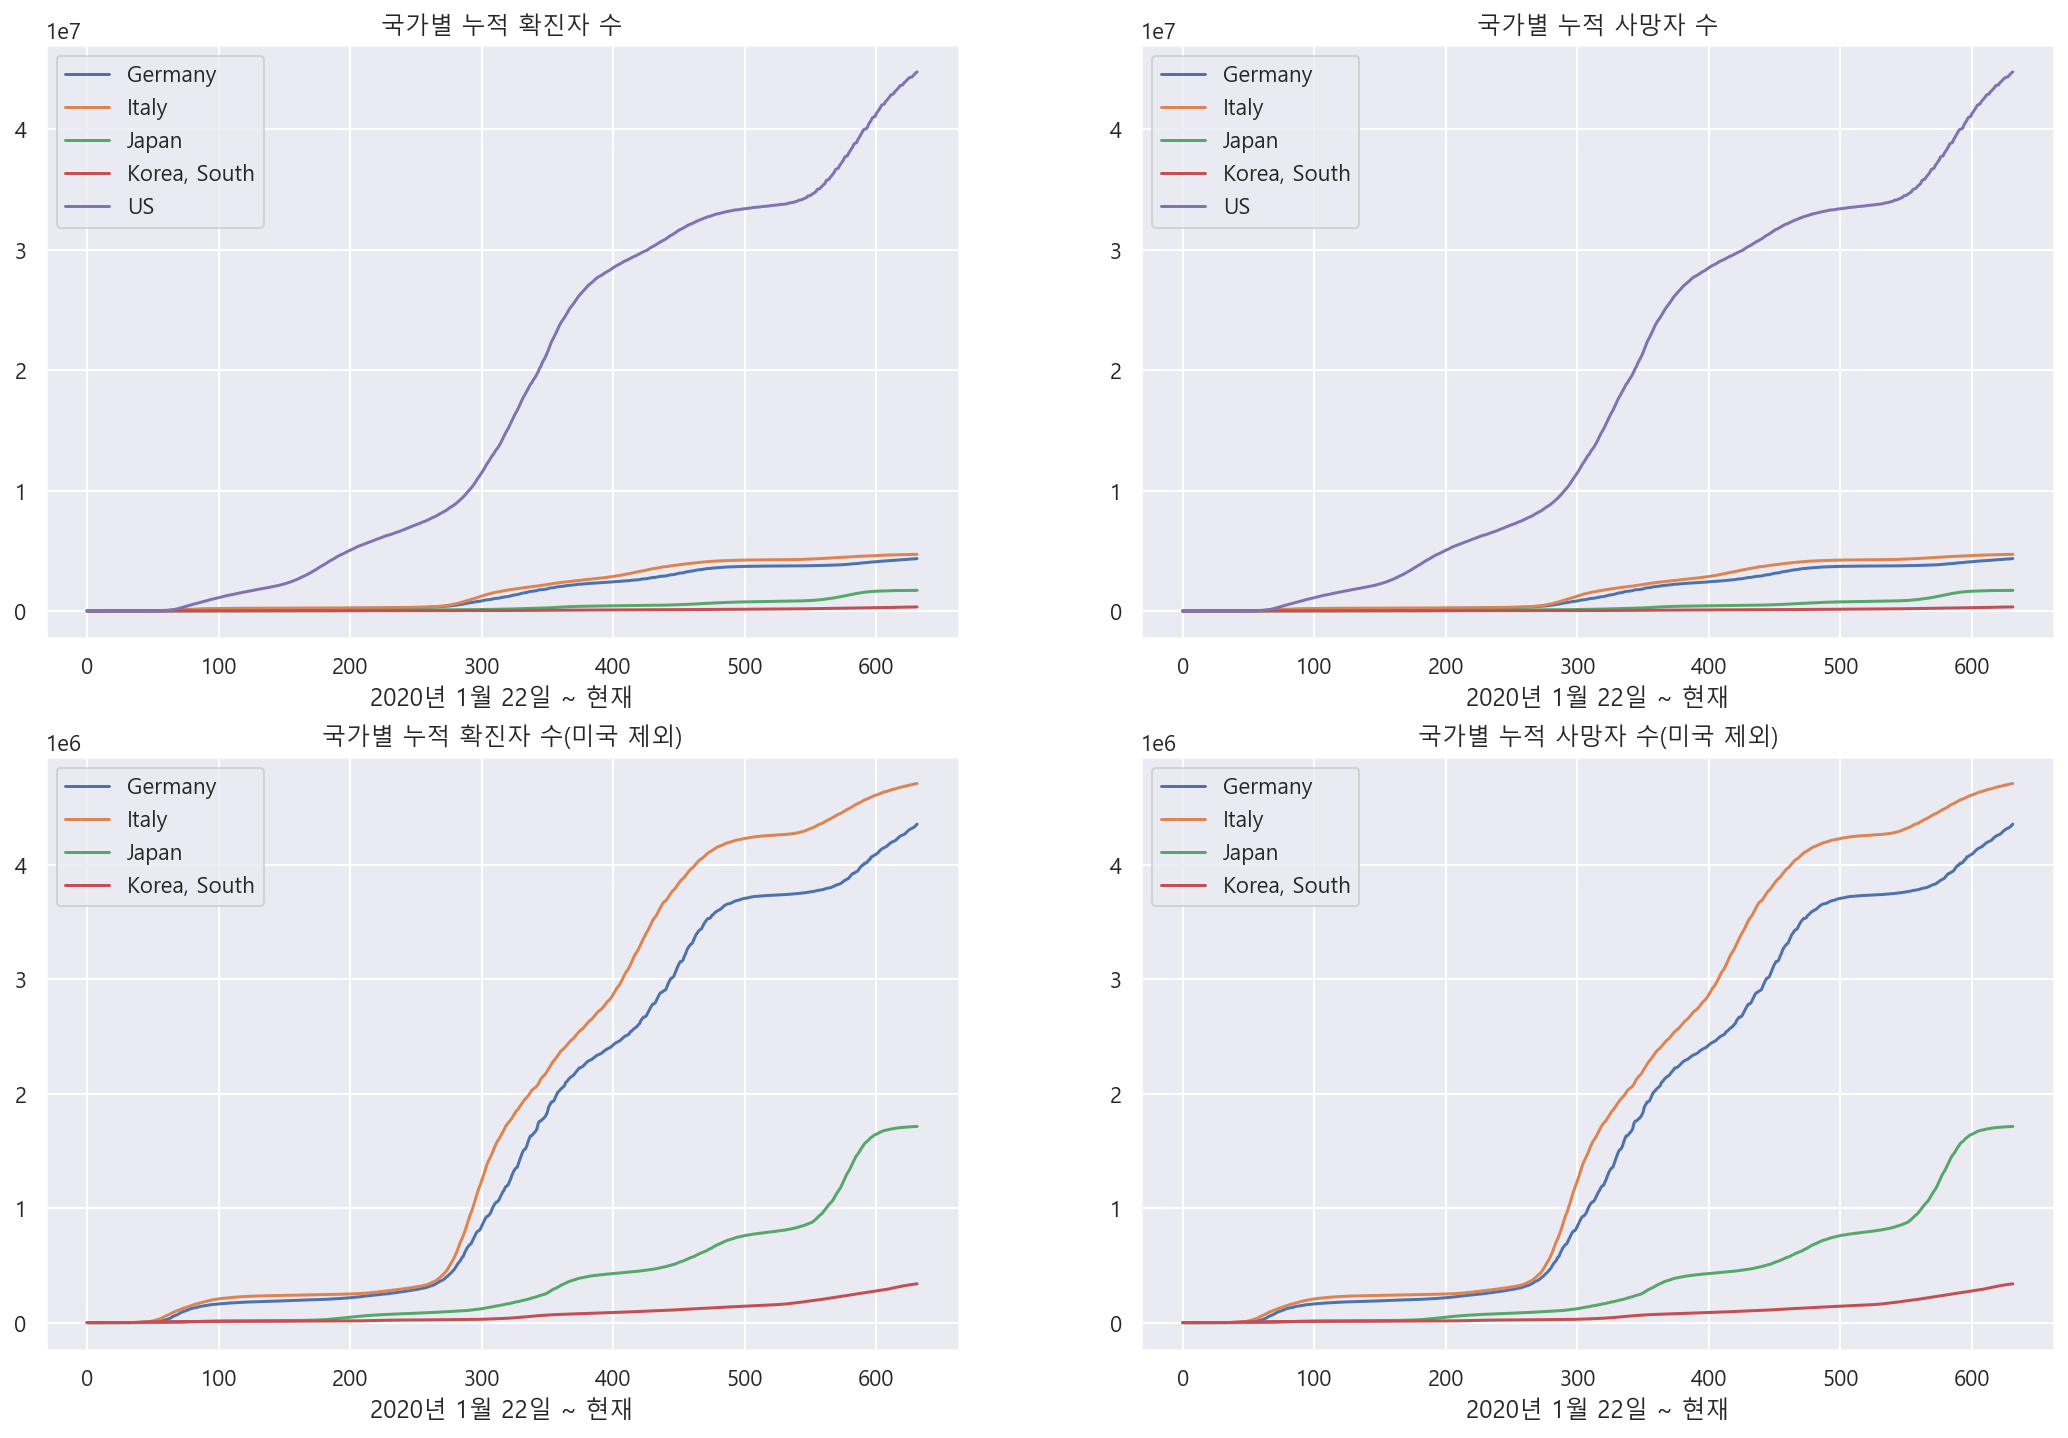

In [20]:
def 문제3번():
    f = plt.figure(figsize=(18,12))

    for num in range(1, 5):
        # 그래프
        p_ = f.add_subplot(2,2,num)
        for idx, rows in confirmed_df_5_cp.iterrows():

            if ((num == 3) or (num == 4)) and idx == "US":
                continue

            p_.plot([idx for idx, _ in enumerate(rows.index)], list(rows), label=idx)

        # 제목   
        title =""
        if num == 1:
            title = "국가별 누적 확진자 수"
        elif num == 2:
            title = "국가별 누적 사망자 수"
        elif num == 3:
            title = "국가별 누적 확진자 수(미국 제외)"
        elif num == 4:
            title = "국가별 누적 사망자 수(미국 제외)"

        # X축 라벨
        xlabel = "2020년 1월 22일 ~ 현재"

        p_.set_title(title)
        p_.set_xlabel(xlabel)
        p_.legend()

    plt.show()
    
문제3번()

# 문제 3번
- 여러분들 판단에 우리나라의 방역 대응능력을 평가할 수 있는 시각화 방법을고민하고 제시해주세요.
---
### 방법
1) 문제 3번 그래프와 동일하게 국가별 코로나 19 확진자 수에 대한 추이를 먼저 확인하여 절대적인 환진자 수를 파악합니다.<br>
    - 그러나 국가별 전체 인구수와 지역별 인구수가 모두 다르기 때문에 해당 작업만으로 방역 대응 능력을 평가하기 어렵습니다.<br>
    - 해당 과정에서 X축을 시간(일자)으로 하는 <b>선 그래프</b>를 이용한 시각화가 적절합니다.
<br>
<br>
2) 전체 인구수 대비 코로나 확진 수를 확인하기 위해서 확진자 수 비율을 정규화 과정을 통해 추출합니다<br>
    - 예를 들어, 33400/50,000,000(대한민국 국민수) 과 같은 꼴로 분석 대상 국가의 코로나 확진 비율을 0~1 사이의 수로 통일합니다.<br>
    - 해당 과정에서 X축을 국가이름, Y축을 확진 비율 값으로 설정하고 <b>막대 그래프</b>를 이용하여 시각화 하는 것이 적절합니다.
<br>
<br>
3) 혹은, 전체 인구수 대비가 아닌 각 국가별로 10만명당 코로나 확진 비율의 평균값을 구하여 비교합니다.<br>
    - - 해당 과정에서 X축을 국가이름, Y축을 확진 비율 값으로 설정하고 <b>막대 그래프</b>를 이용하여 시각화 하는 것이 적절합니다.
<br>
<br>
4) 2), 3) 과정과 동일하게 인구수 대비 사망자 비율값 혹은 비율의 평균값을 구하고 확진자 비율과 사망자 비율을 각각 X축 Y축으로 하여 버블 차트를 이용해 시각화 하면 국가별로 버블이 크고 작음을 비교하기 좋습니다.
<br>
<br>
5) 지금까지 집계한 확진률과 사망률이 높을 수록 방역 대응 능력이 부족하다고 평가할 수 있겠습니다. 하지만 절대적인 평기 지표가 될 수 없으며, 국가 지형, 환경 등의 요인을 모두 검토하여 비교하는 것이 타당할 것이고, 방역 대응 평가에 앞서 코로나는 현재 계속해서 진행중이기 때문에 WITH 코로나가 진행되고 나서도 끝까지 방역 대응에 집중해야한다는 사실을 강조해야합니다.
<br>
<br>

---

# 문제 4번
- 문제3의경우에서 다시 인구수별비율로 표현하려는 노력도 함께해주세요.
- 5개 국가뿐이니 인구수는 단순검색을 통해 용이하게 구할 수 있을 것으로 보입니다.

In [21]:
# 이탈리아 : 6,036만 7,471명
# 독일 : 8,390만 471명
# 일본 : 1억 2,605만 796명
# 대한민국 : 5,182만 1,669명
# 미국 : 3억 3,291만 5,074명
italy_p = 60367471
germany_p = 83900471
japan_p = 126050796
korea_p = 51821669
us_p = 332915074

In [22]:
# 국가별 확진자 수 테이블
confirmed_5_curr = pd.DataFrame(confirmed_df_5_cp[confirmed_df_5_cp.columns[-1]])
confirmed_5_curr["인구수"] = np.nan
confirmed_5_curr.loc["Germany", "인구수"] = germany_p
confirmed_5_curr.loc["Italy", "인구수"] = italy_p
confirmed_5_curr.loc["Japan", "인구수"] = japan_p
confirmed_5_curr.loc["Korea, South", "인구수"] = korea_p
confirmed_5_curr.loc["US", "인구수"] = us_p

In [23]:
confirmed_5_curr

,10/14/21,인구수
Country/Region,,
Germany,4355169,83900471.0
Italy,4709753,60367471.0
Japan,1714060,126050796.0
"Korea, South",339361,51821669.0
US,44767906,332915074.0


In [130]:
# 국가별 확진자 수 테이블
confirmed_5_curr = pd.DataFrame(confirmed_df_5_cp[confirmed_df_5_cp.columns[-1]])
confirmed_5_curr["인구수"] = np.nan
confirmed_5_curr.loc["Germany", "인구수"] = germany_p
confirmed_5_curr.loc["Italy", "인구수"] = italy_p
confirmed_5_curr.loc["Japan", "인구수"] = japan_p
confirmed_5_curr.loc["Korea, South", "인구수"] = korea_p
confirmed_5_curr.loc["US", "인구수"] = us_p
confirmed_5_curr.rename(columns={confirmed_5_curr.columns[0]:"누적확진자"}, inplace=True)

# 국가별 사망자 수 테이블
deaths_5_curr = pd.DataFrame(deaths_df_5_cp[confirmed_df_5_cp.columns[-1]])
deaths_5_curr.rename(columns={deaths_5_curr.columns[0]:"누적사망자"}, inplace=True)

# 확진자, 사망자 테이블 가로 concat
df_curr_all = pd.concat([confirmed_5_curr, deaths_5_curr], axis=1)

In [131]:
df_curr_all

,누적확진자,인구수,누적사망자
Country/Region,,,
Germany,4331274,83900471.0,94393
Italy,4704318,60367471.0,131384
Japan,1712740,126050796.0,17999
"Korea, South",335742,51821669.0,2605
US,44562257,332915074.0,716471


In [132]:
df_curr_all["확진률"] = round(df_curr_all["누적확진자"] / confirmed_5_curr["인구수"] * 100, 5)
df_curr_all["사망률"] = round(df_curr_all["누적사망자"] / df_curr_all["누적확진자"] * 100, 5)

In [133]:
df_curr_all

,누적확진자,인구수,누적사망자,확진률,사망률
Country/Region,,,,,
Germany,4331274,83900471.0,94393,5.16240,2.17934
Italy,4704318,60367471.0,131384,7.79280,2.79284
Japan,1712740,126050796.0,17999,1.35877,1.05089
"Korea, South",335742,51821669.0,2605,0.64788,0.77589
US,44562257,332915074.0,716471,13.38547,1.60780


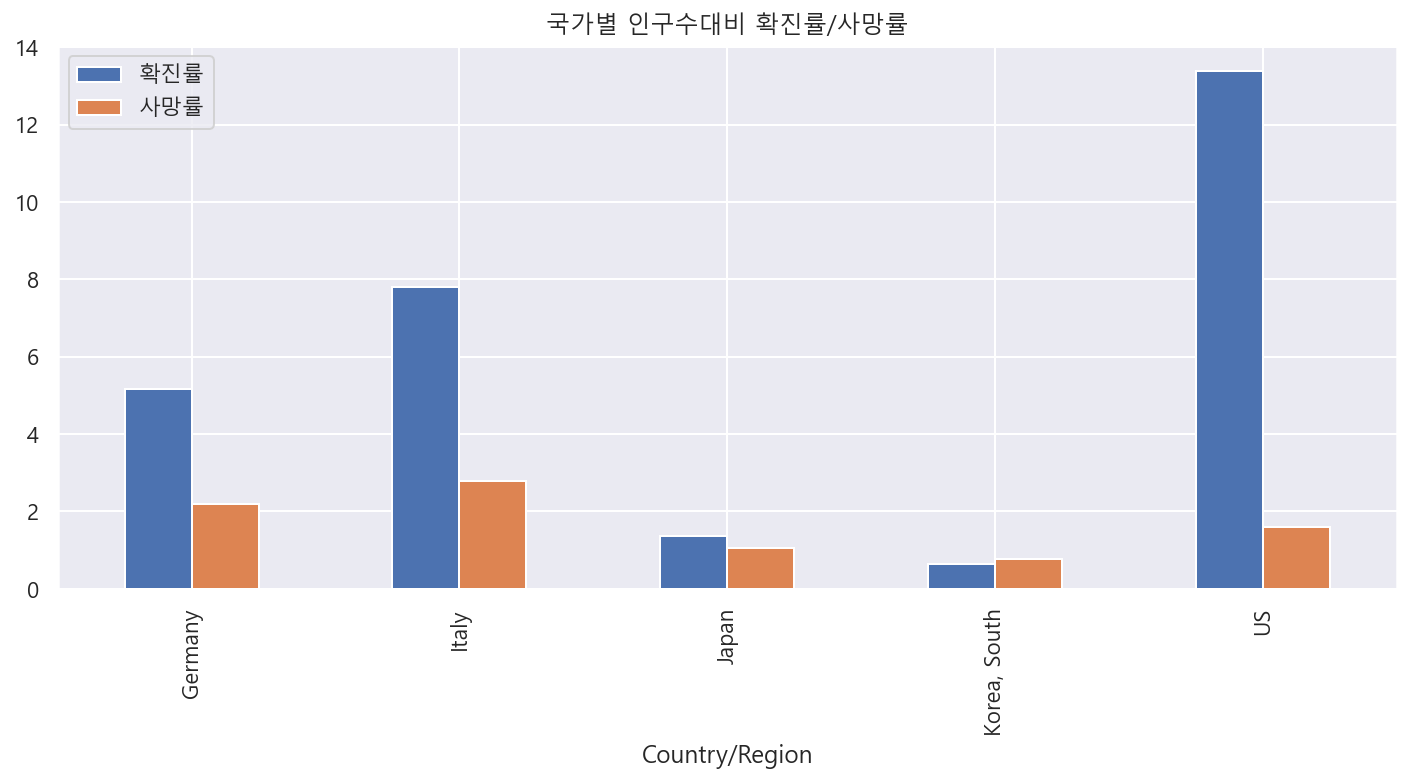

In [134]:
df_curr_all[["확진률", "사망률"]].plot.bar(figsize=(12,5), title="국가별 인구수대비 확진률/사망률");

---

# 문제 5번
- 전체 데이터의 시계열분석을 통해 전체 트렌드와 주기별 특성을 관찰해주세요.어떤특이점이있나요?
- 5개 각 국가의 데이터에서는 동일과정에서 어떤 특이한현상이 있나요?

### 문제 5번에 대한 종합 분석

- <b>5개국 모두 코로나 확진자(감염자) 추이가 꾸준히 증가하고 있으며, 주기적으로 주말이 다가올 수록 코로나 확진자가 증가하는 걸 알 수 있습니다. 분석 대상 국가 모두 금요일, 토요일을 중심으로 모임이 많은 등의 유동 인구 증가를 예상할 수 있습니다. </b>

In [135]:
df_curr_all.index

Index(['Germany', 'Italy', 'Japan', 'Korea, South', 'US'], dtype='object', name='Country/Region')

In [136]:
def search_trend(region):
    df_each = pd.DataFrame({
        "ds" : confirmed_df_5.columns[4:-1],
        "y" : confirmed_df_5[confirmed_df_5["Country/Region"] == region][confirmed_df_5.columns[4:-1]].values.tolist()[0]
    })

    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(df_each)
    future = m.make_future_dataframe(periods=0)
    forecast = m.predict(future)
    df_f_choice = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    
    # Forecast 데이터 plot 및 종횡선 추가
    fig = m.plot(forecast);
    a = add_changepoints_to_plot(fig.gca(), m, forecast)

    # Trend 파악
    m.plot_components(forecast);

### 독일의 환진자수 트렌드 파악
- 2020년 11월 이후로 코로나 확진자 수가 다소 급히 증가 되고 있으며, 꾸준히 상향 되고 있는 트렌드를 확인할 수 있습니다.
- 또한, 주기별 특성을 관찰 했을 때, 수요일을 시작으로 목요일, 금요일, 토요일에 코로나 확진자 수가 많아 지고 있습니다.

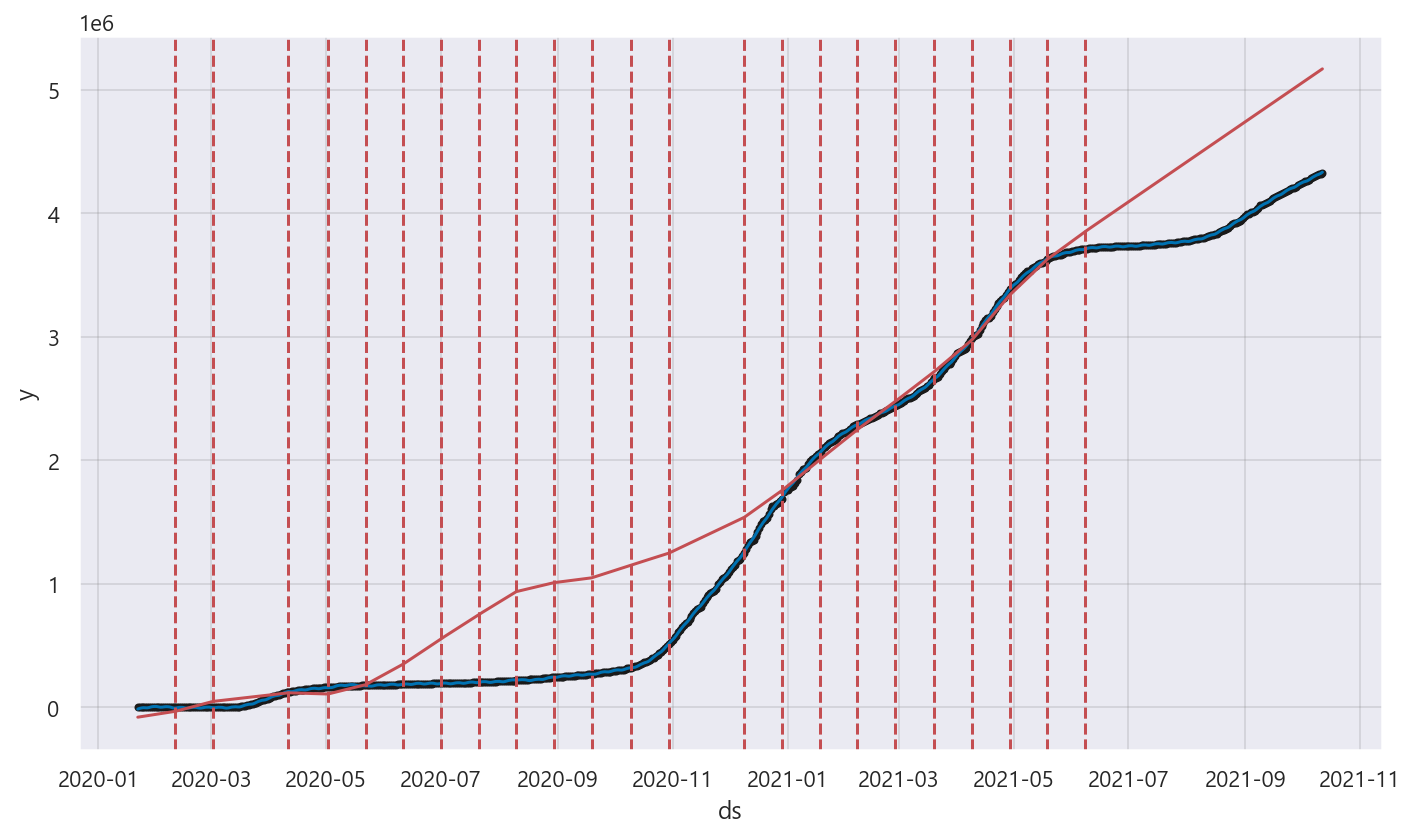

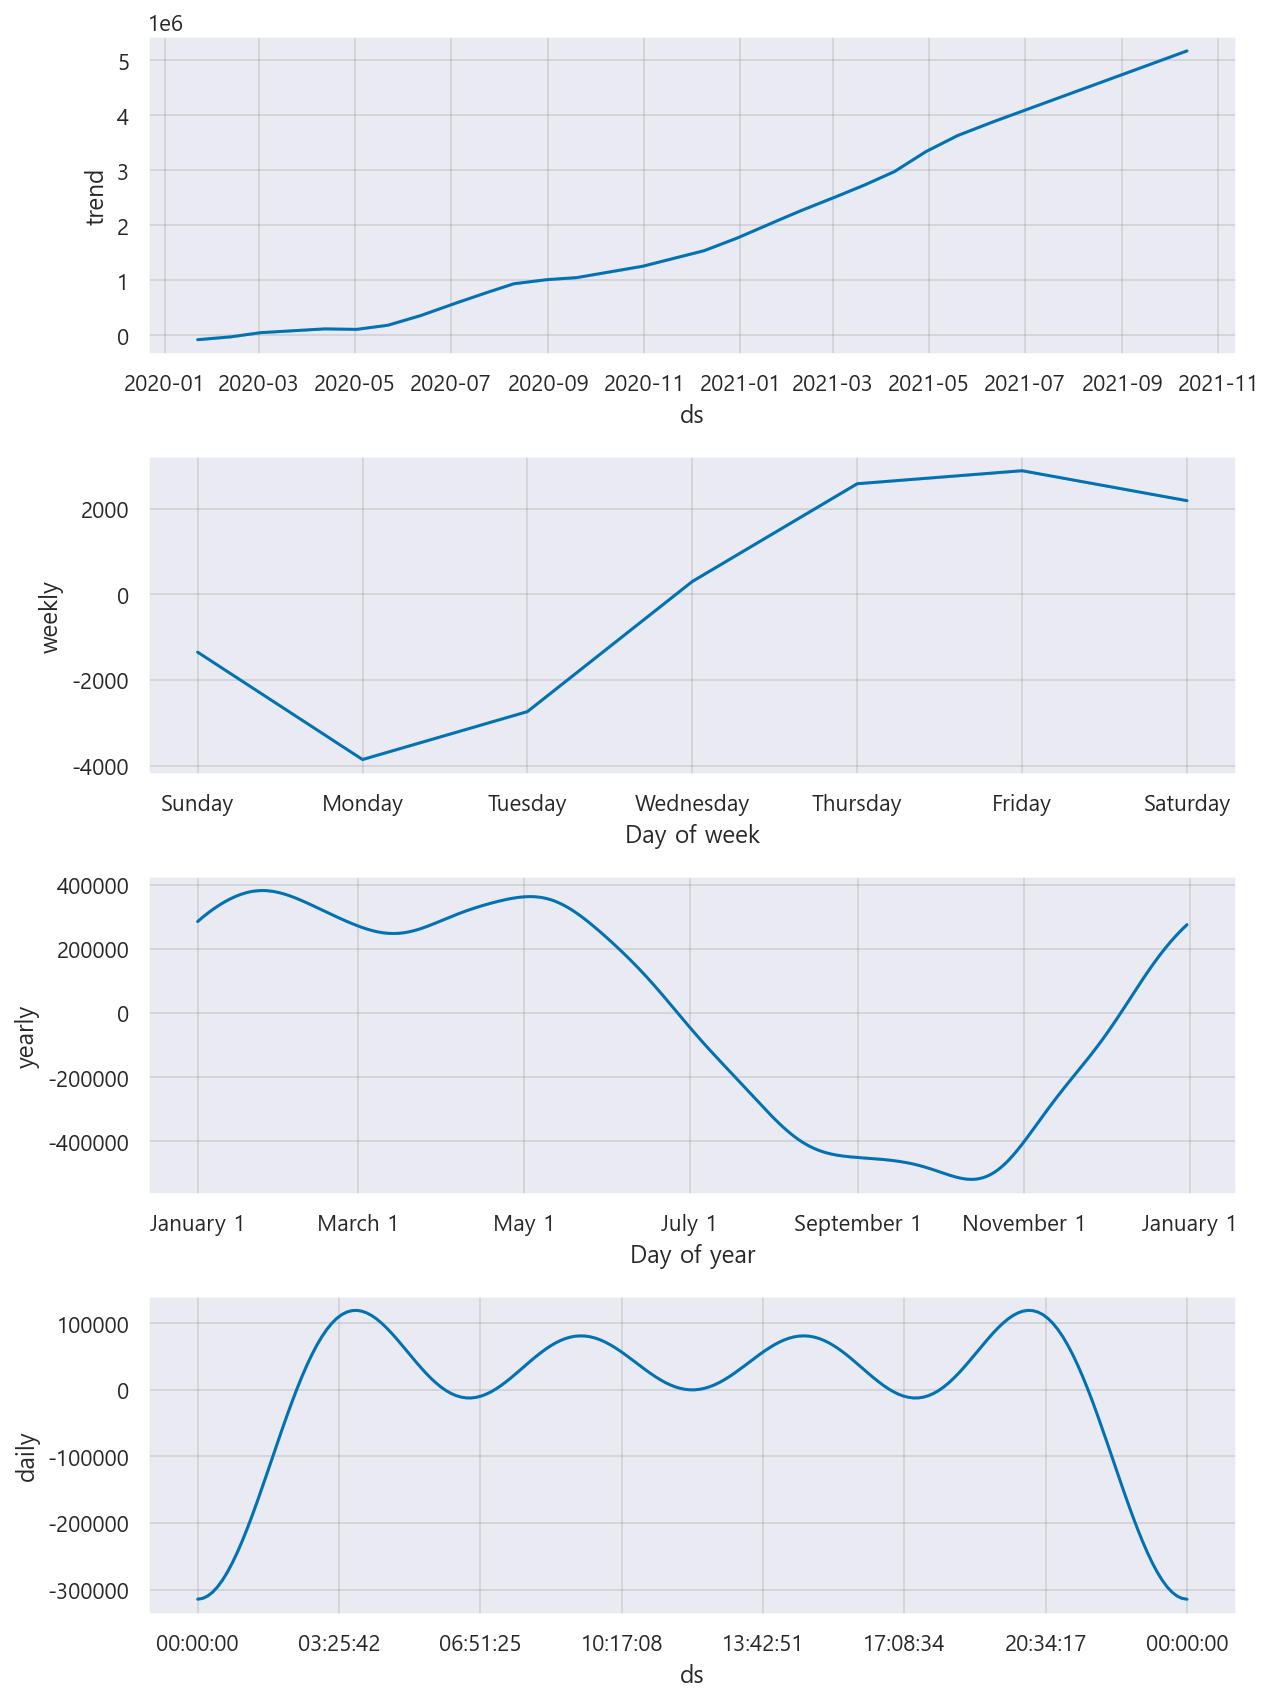

In [137]:
search_trend("Germany")

### 이탈리아의 환진자수 트렌드 파악
- 2020년 10월 이후로 코로나 확진자 수가 다소 급히 증가 되고 있으며, 꾸준히 상향 되고 있는 트렌드를 확인할 수 있습니다.
- 또한, 주기별 특성을 관찰 했을 때, 목요일을 시작으로 금요일, 토요일, 일요일에 코로나 확진자 수가 많아 지고 있습니다.

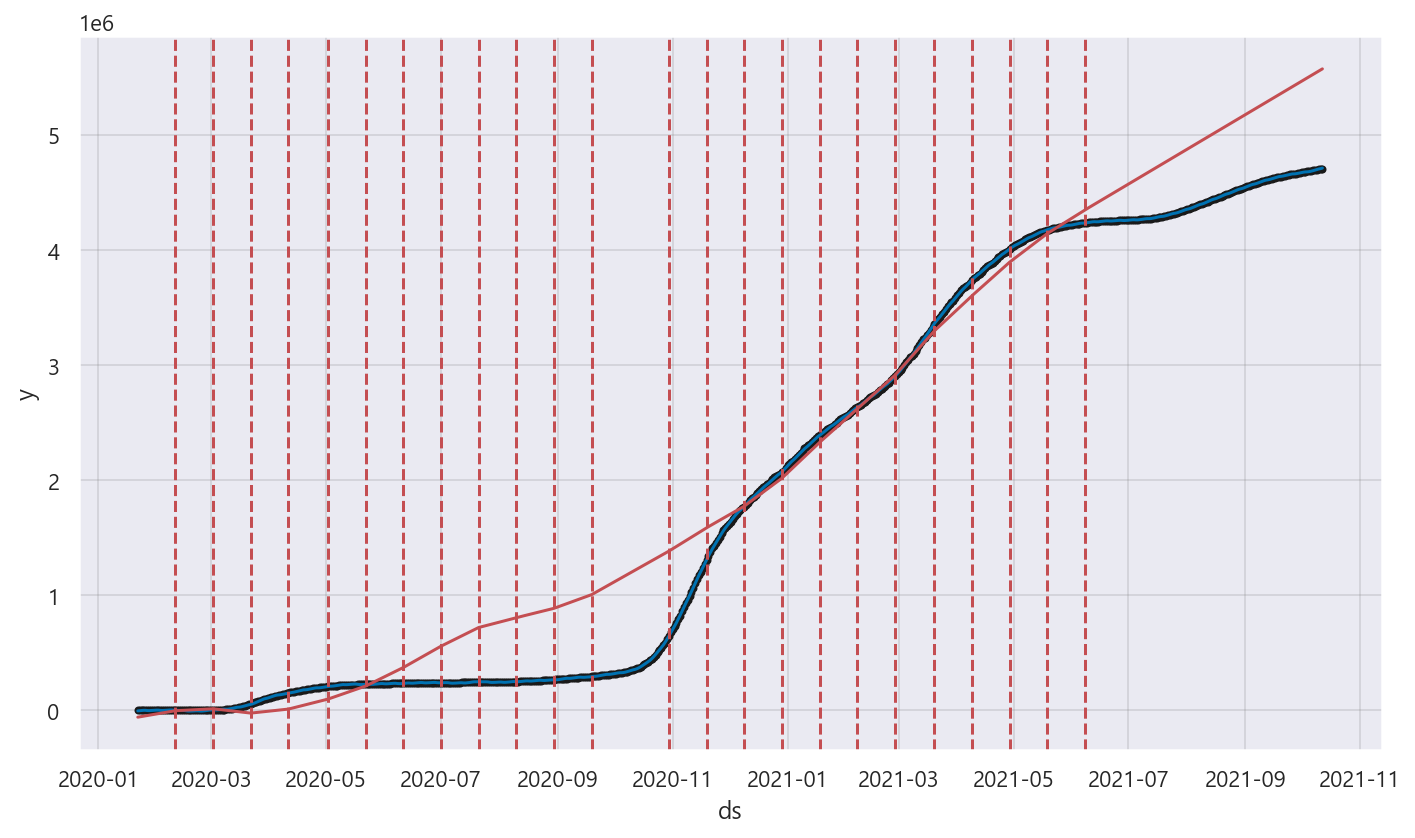

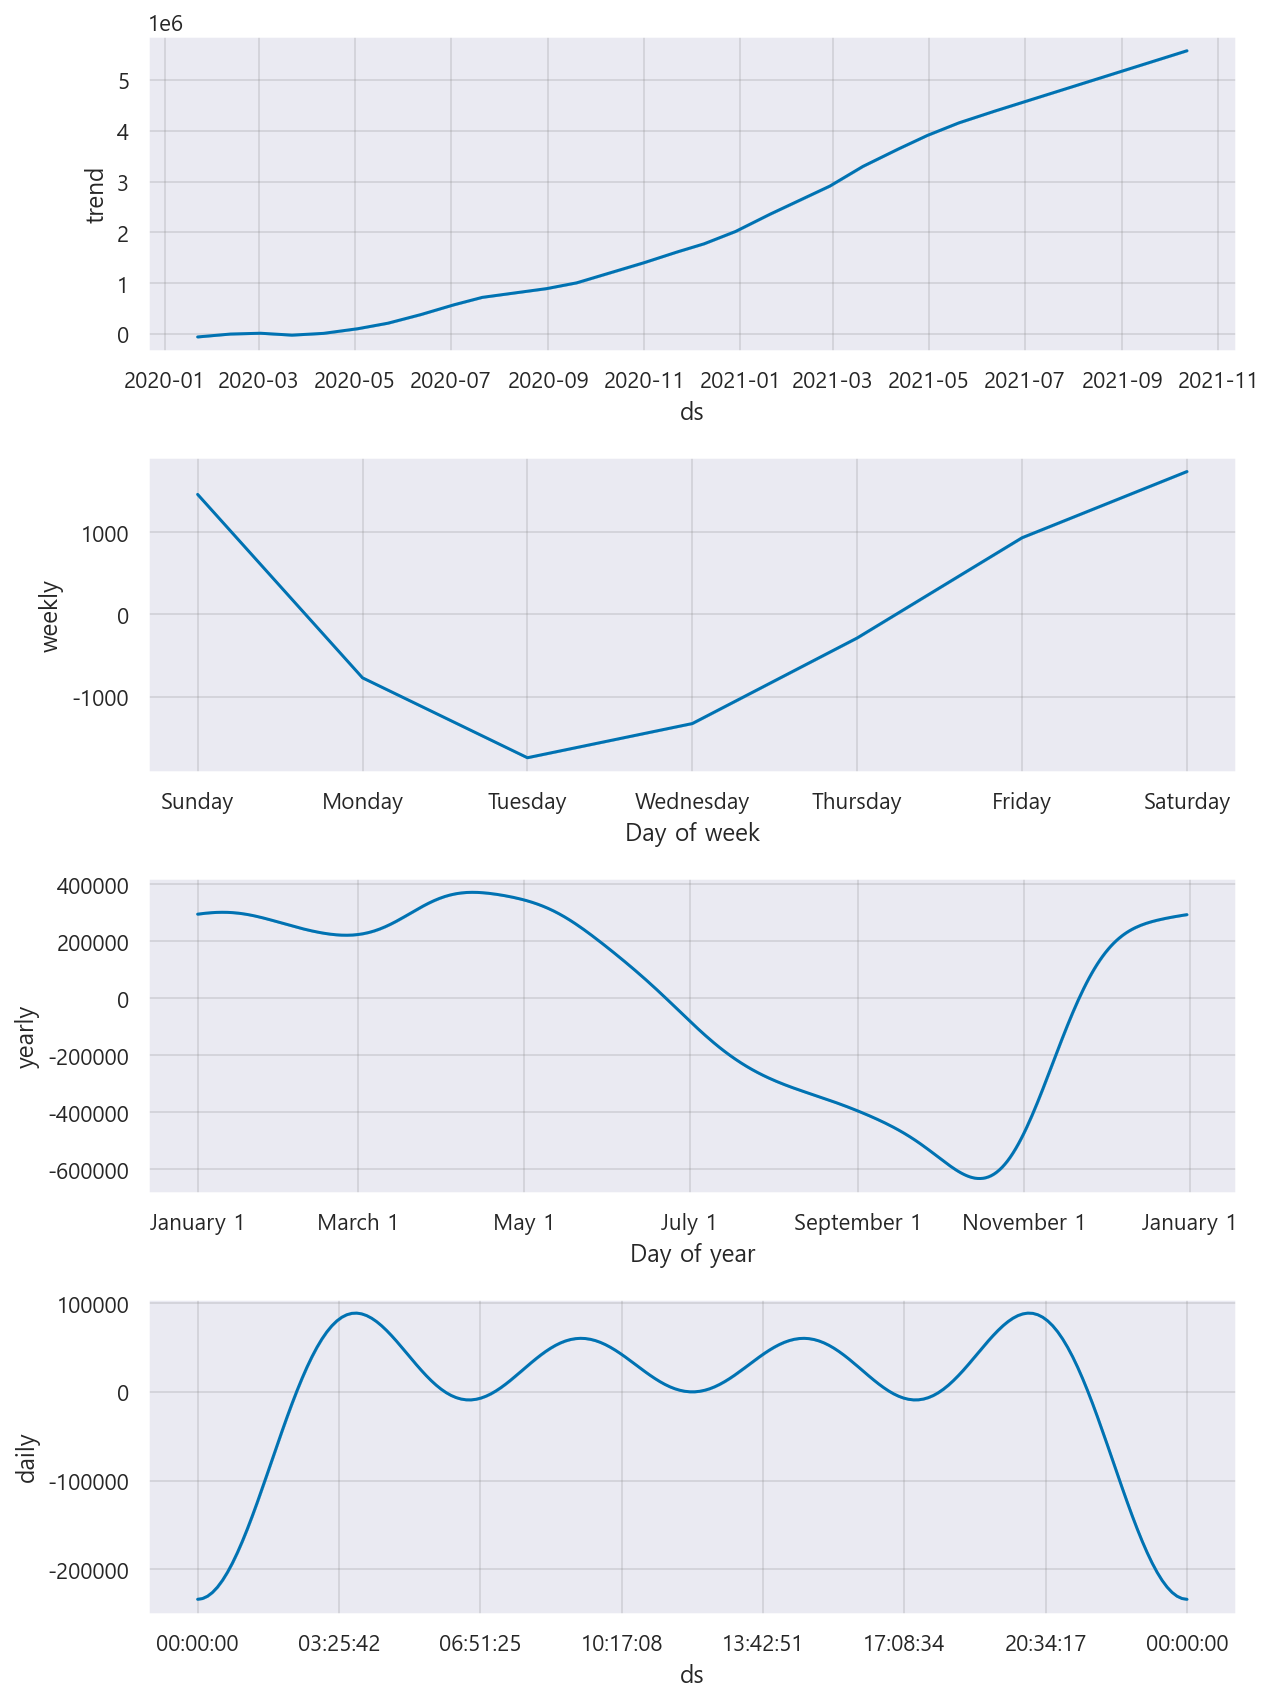

In [138]:
search_trend("Italy")

### 일본의 환진자수 트렌드 파악
- 2021년 8월 이후로 코로나 확진자 수가 다소 급히 증가 되고 있으며, 꾸준히 상향 되고 있는 트렌드를 확인할 수 있습니다.
- 또한, 주기별 특성을 관찰 했을 때, 목요일을 시작으로 금요일, 토요일, 일요일에 코로나 확진자 수가 많아 지고 있습니다.

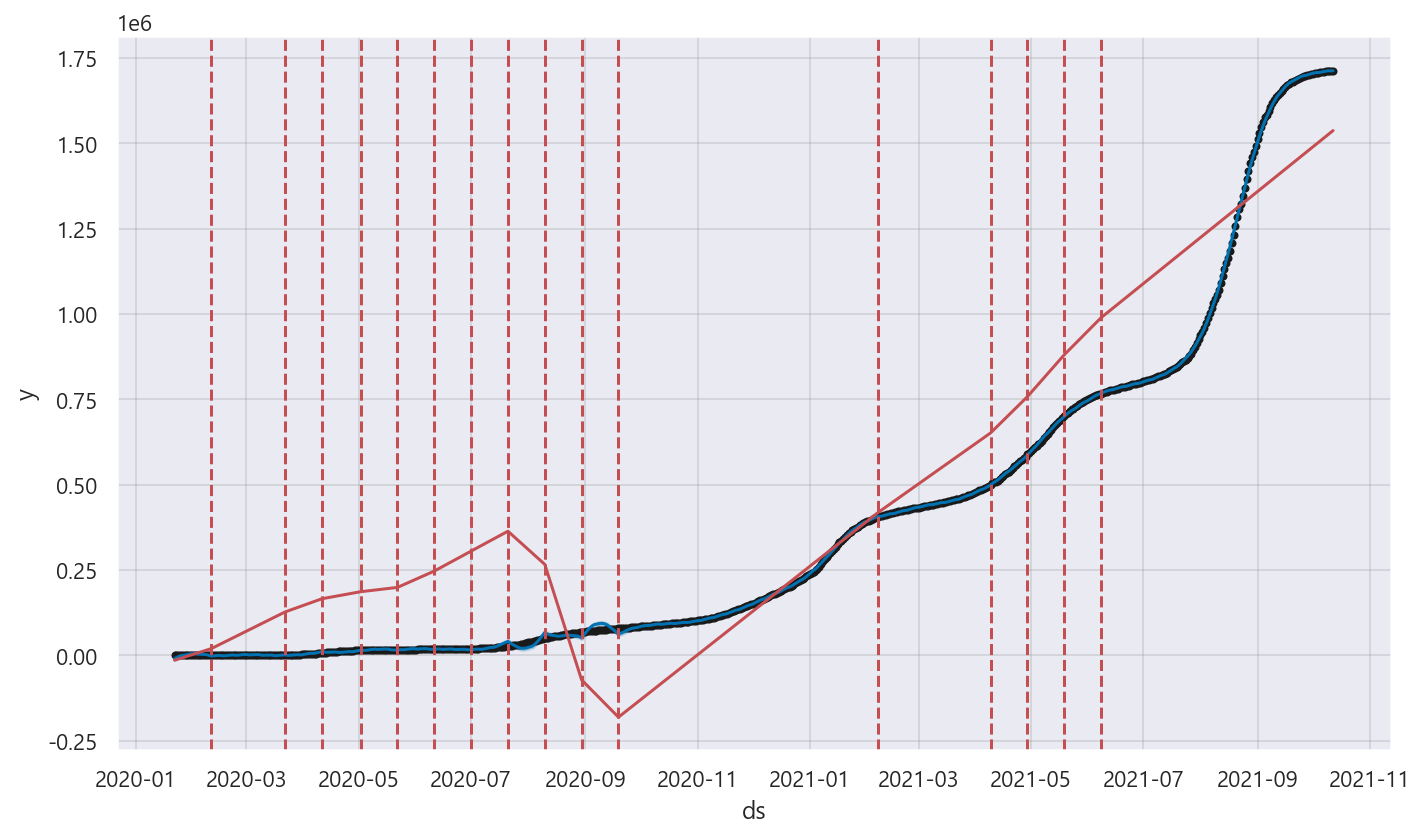

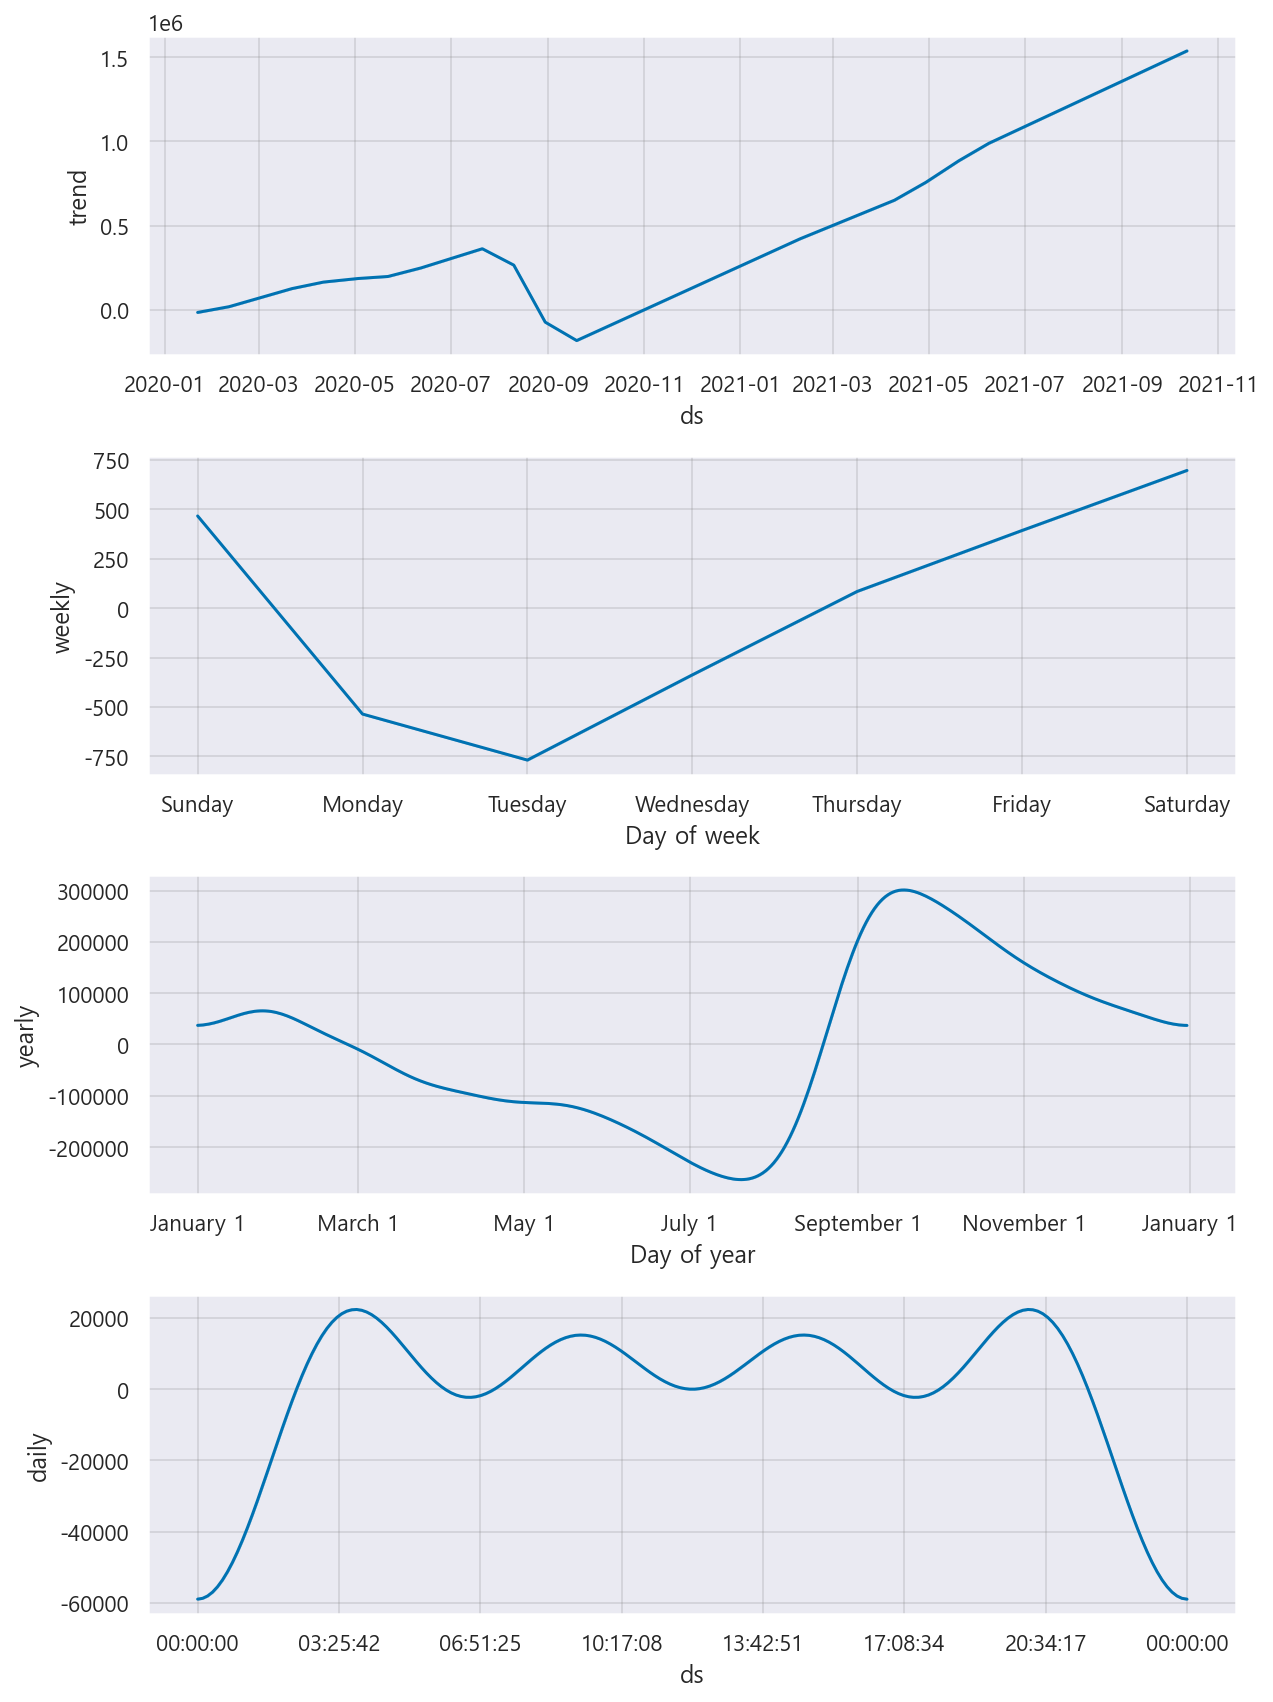

In [139]:
search_trend("Japan")

### 대한민국의 환진자수 트렌드 파악
- 2021년 7월 이후로 코로나 확진자 수가 다소 급히 증가 되고 있으며, 꾸준히 상향 되고 있는 트렌드를 확인할 수 있습니다.
- 또한, 주기별 특성을 관찰 했을 때, 수요일을 시작으로 목요일, 금요일, 토요일에 코로나 확진자 수가 많아 지고 있습니다.

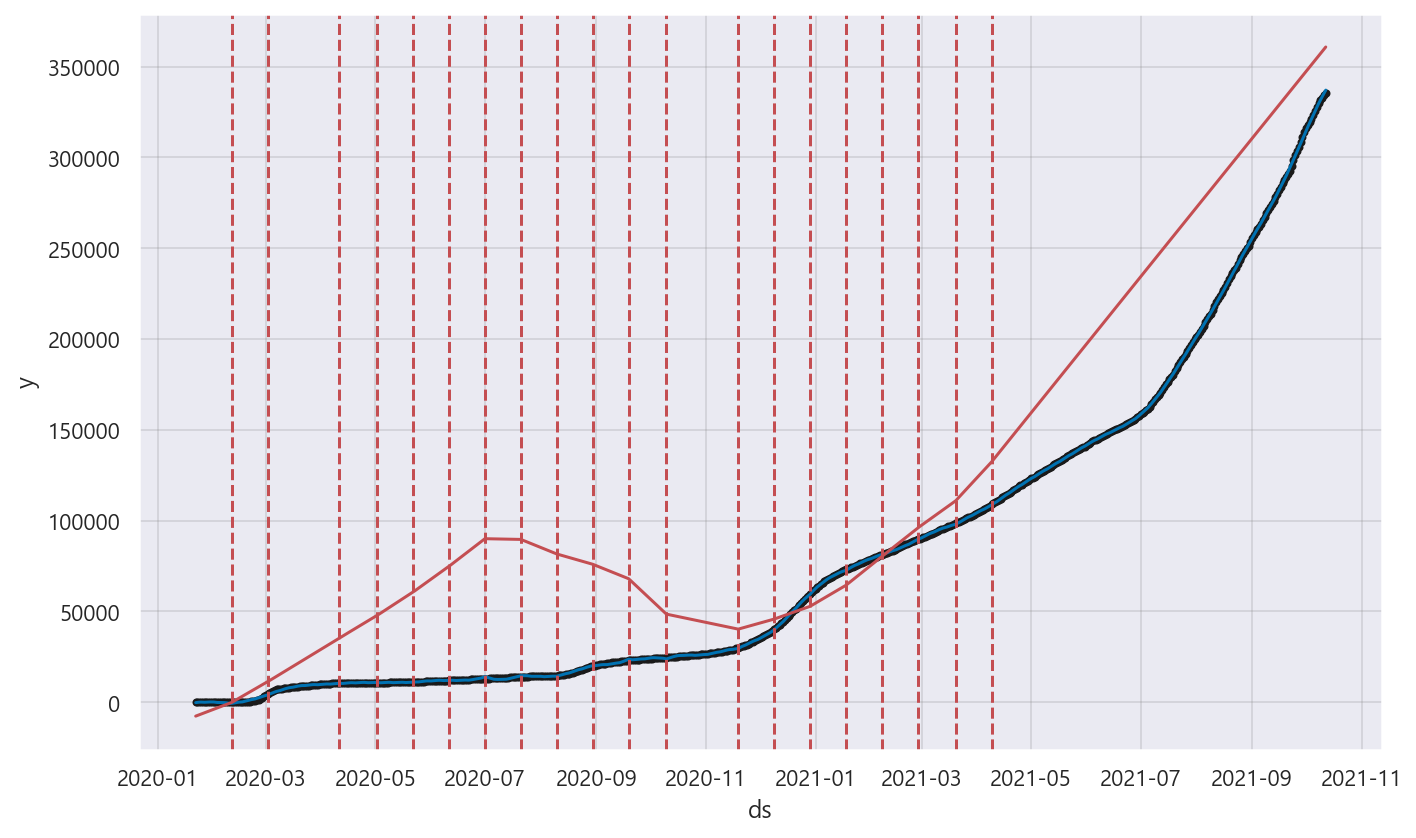

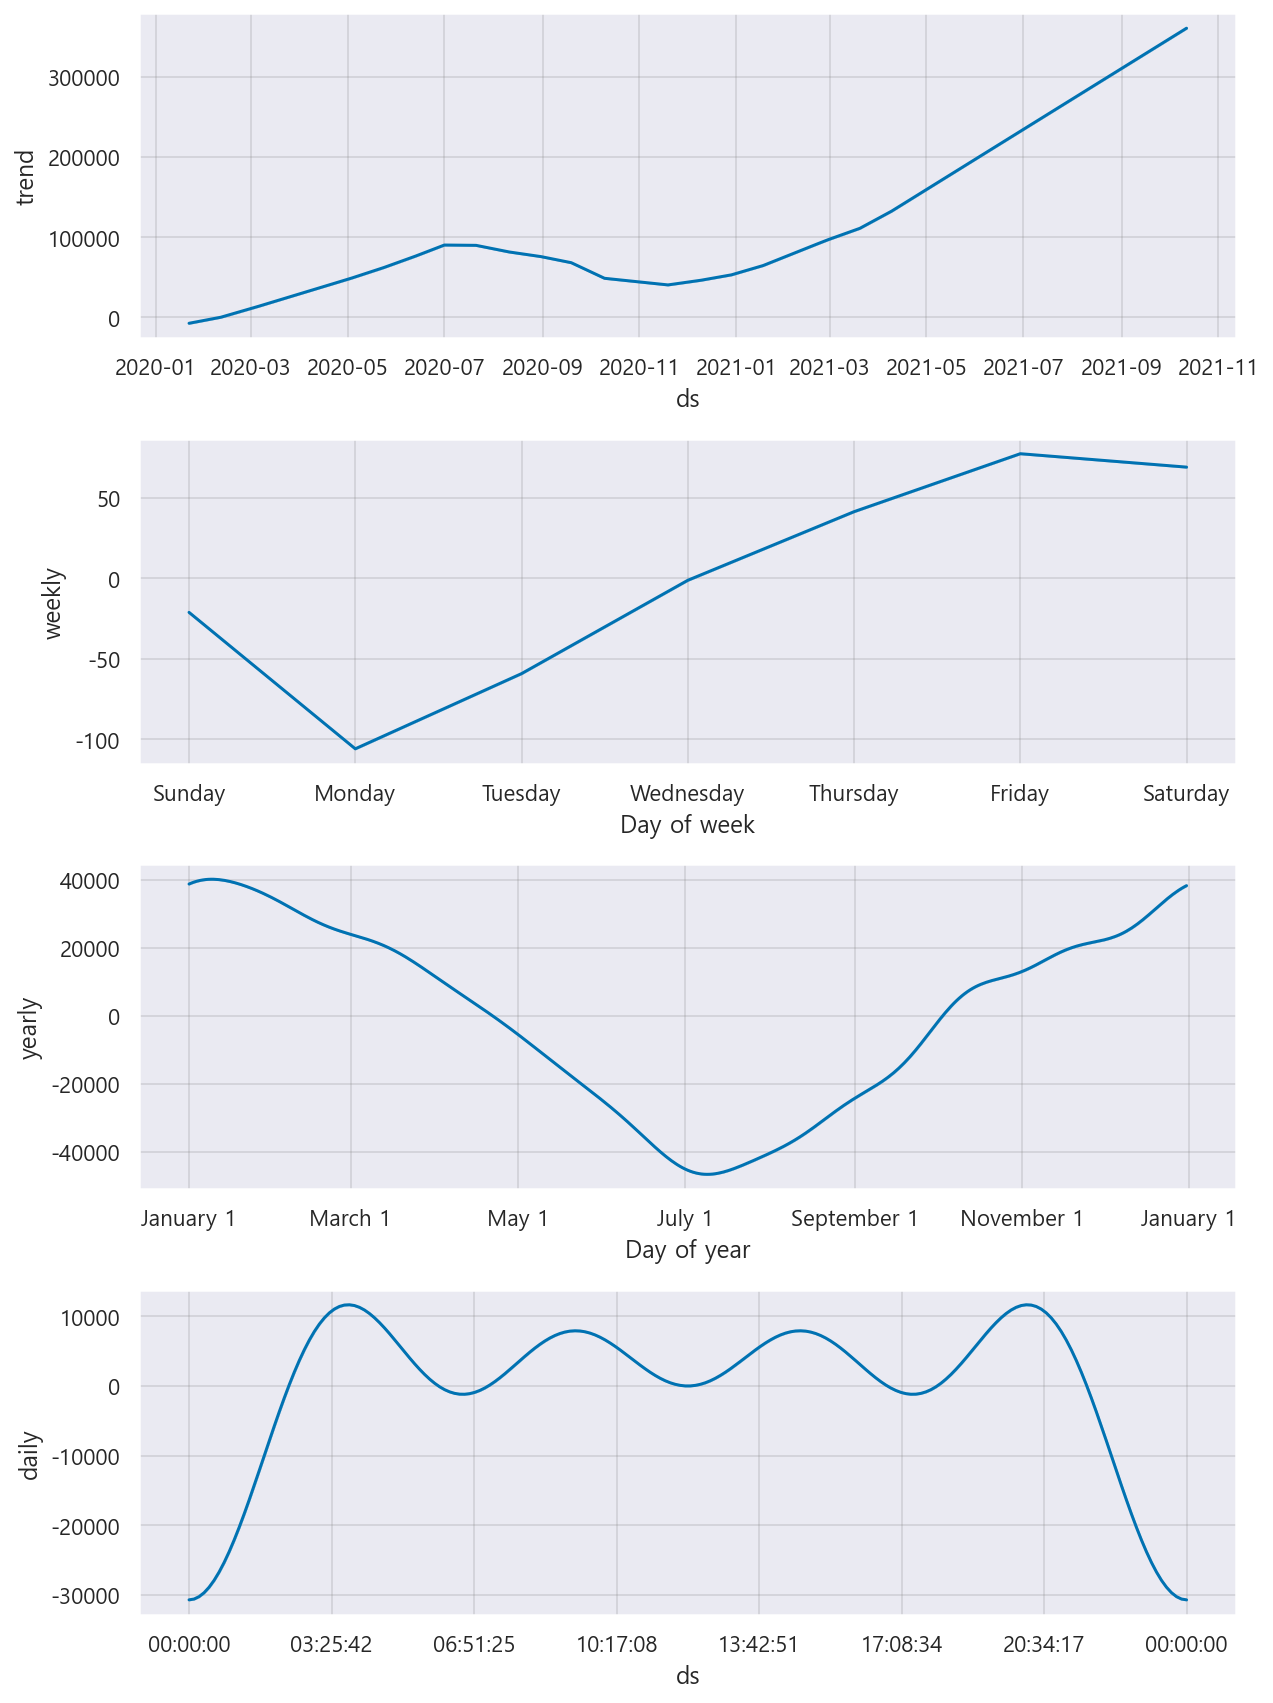

In [140]:
search_trend("Korea, South")

### 미국의 환진자수 트렌드 파악
- 앞서 확인한 국가에 비해 전체 인구수, 확진자수가 가장 높은 나라입니다.
- 2020년 11월 ~ 2021년 02월 사이에 다소 급히 코로나 확진자가 증가 했으며, 대체적으로 꾸준히 증가 중입니다.
- 또한, 주기별 특성을 관찰 했을 때, 목요일을 시작으로 금요일, 토요일에 코로나 확진자 수가 많아 지고 있습니다.

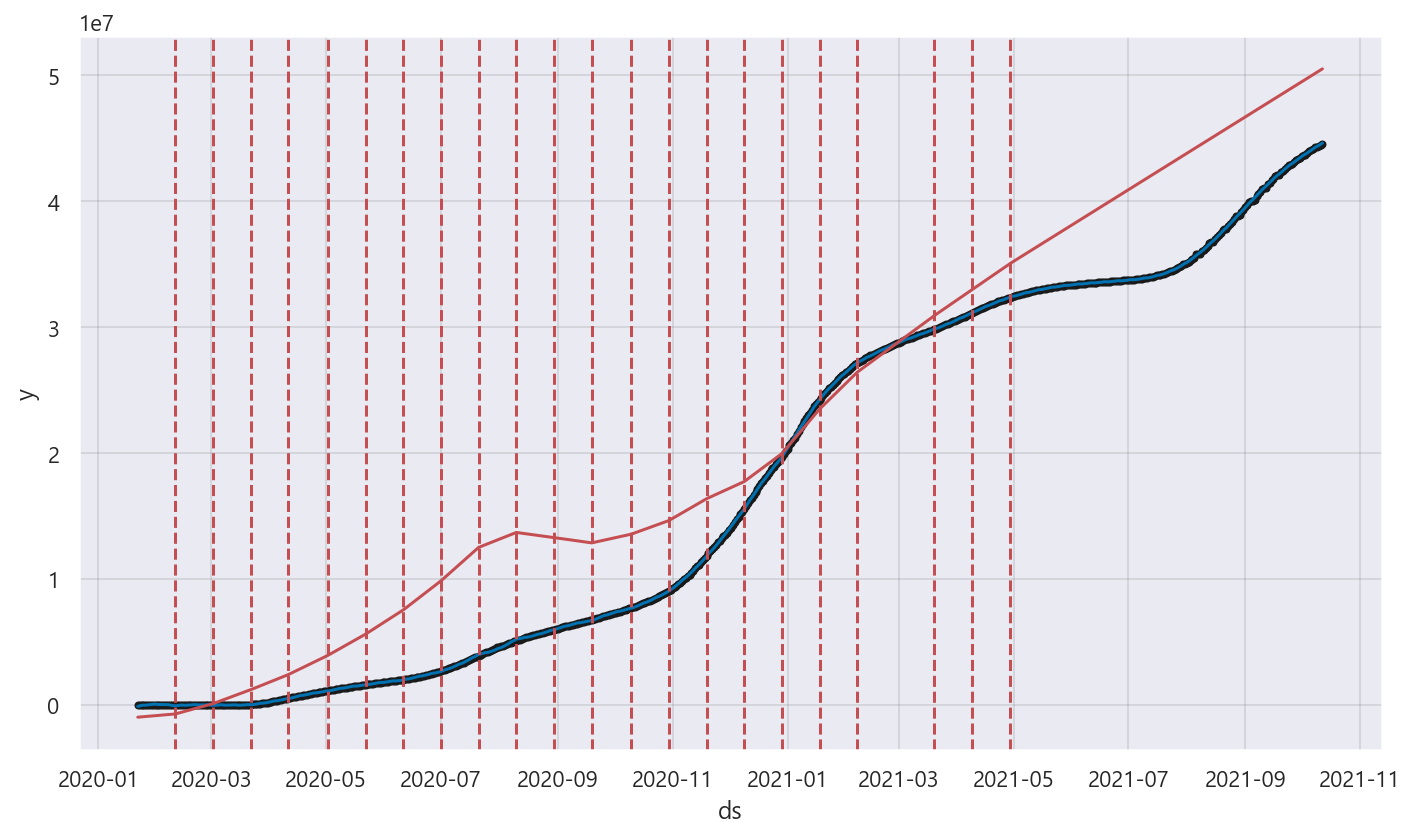

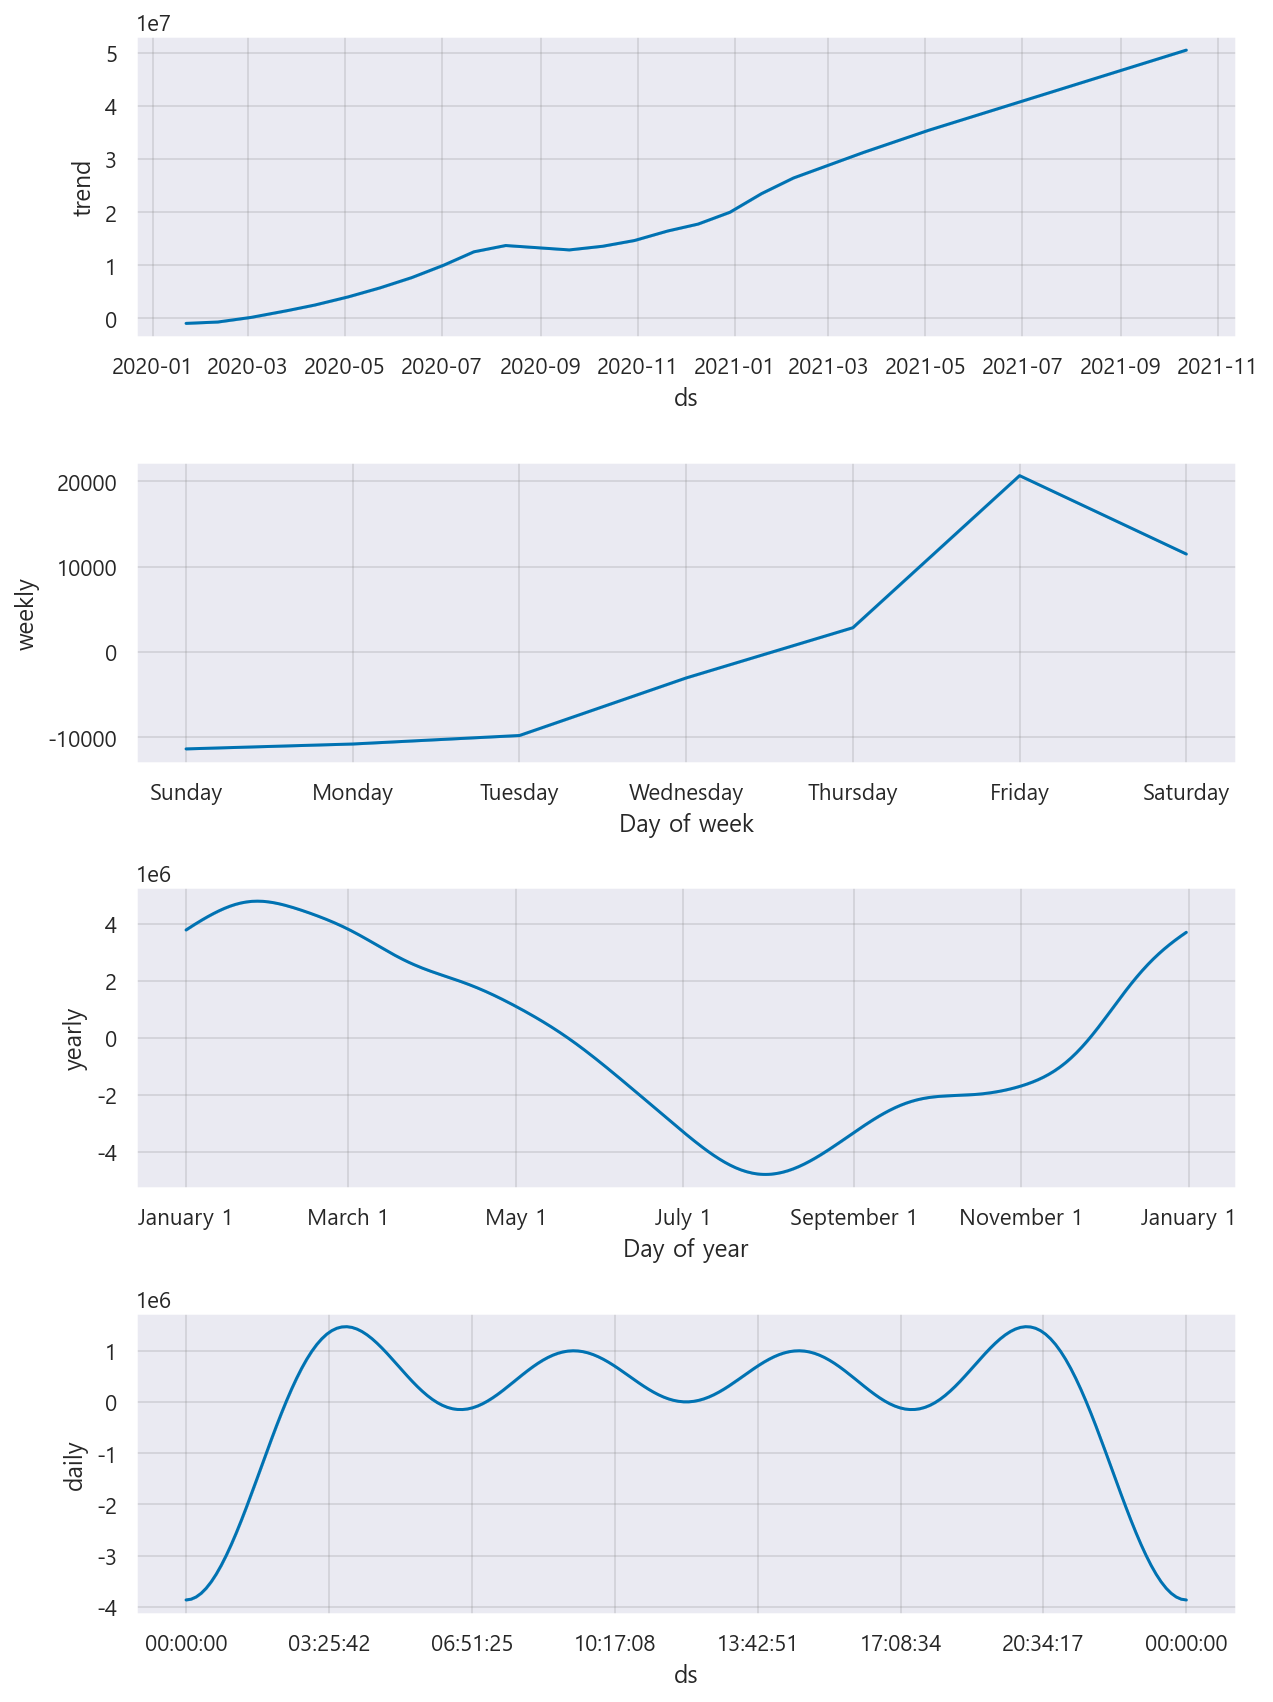

In [141]:
search_trend("US")

---

# 문제 6번
- 여러분들이 선정한 5개국가를 기준으로 우리나라는 어떻다고 이야기 할 수 있을까요
- 그 판단의 근거를 다시 잘 정리해서 함께 보여주세요.
- 이 과정에서 문제1에서 구하지 않은 또 다른 추가데이터를 사용해도 됩니다.(예를들어 백신접종률데이터)
- 물론 추가되는 데이터는 여러분들이 직접검색해서 찾아야합니다.

In [142]:
ten_mil = 100000
df_curr_all_2 = df_curr_all.copy()
df_curr_all_2["인구10만명당_감염_발생자"] = round((df_curr_all_2["누적확진자"] * ten_mil)/df_curr_all_2["인구수"], 0)
df_curr_all_2["인구10만명당_사망_발생자"] = round((df_curr_all_2["누적사망자"] * ten_mil)/df_curr_all_2["인구수"], 0)

In [143]:
df_curr_all_2

,누적확진자,인구수,누적사망자,확진률,사망률,인구10만명당_감염_발생자,인구10만명당_사망_발생자
Country/Region,,,,,,,
Germany,4331274,83900471.0,94393,5.16240,2.17934,5162.0,113.0
Italy,4704318,60367471.0,131384,7.79280,2.79284,7793.0,218.0
Japan,1712740,126050796.0,17999,1.35877,1.05089,1359.0,14.0
"Korea, South",335742,51821669.0,2605,0.64788,0.77589,648.0,5.0
US,44562257,332915074.0,716471,13.38547,1.60780,13385.0,215.0


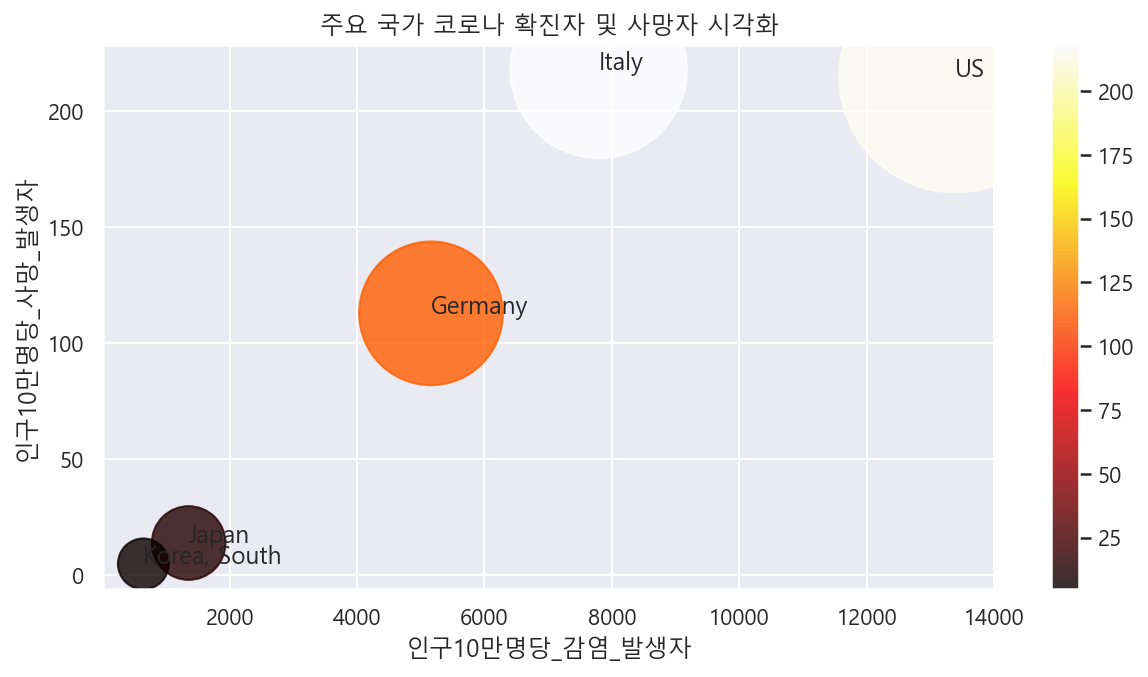

In [144]:
ax = df_curr_all_2.plot.scatter(
    title="주요 국가 코로나 확진자 및 사망자 시각화",
    x="인구10만명당_감염_발생자",
    y="인구10만명당_사망_발생자",
    s=df_curr_all_2["인구10만명당_감염_발생자"],
    c=df_curr_all_2["인구10만명당_사망_발생자"],
    colormap = "hot",
    alpha = 0.8,
    sharex = False,
    figsize = (10,5)
)

for i, txt in enumerate(df_curr_all_2.index):
    ax.annotate(txt, (df_curr_all_2.인구10만명당_감염_발생자.iat[i], df_curr_all_2.인구10만명당_사망_발생자.iat[i]))
plt.show()

### 문제 6번에 대한 분석 정리
- 앞서 진행한 문제 결과를 포함하여, 6번에서 진행한 버블 차트를 참고하겠습니다.
- 미국의 경우 5개국 중에 가장 높은 인구수를 보이고 있으면서, 감염 또는 사망 발생 비율 역시 가장 높은 걸 볼 수 있습니다.
- 미국 인구수가 많고 국민 문화에 자유로움이 더해져 통제가 힘들 것으로 예상 되며
- 미국의 의료 보험 체계가 대한민국과 비교하여 지원 범위가 좁다는 것을 인지하면 더더욱 코로나 관련 사고가 많은 것을 이해할 수 있습니다.
- 반면에 대한민국은 코로나 확진자와 사망자 발생 비율이 5개 국가중 가장 낮은 것을 볼 수 있습니다.
- 또한 대한민국은 의료 지원 또는 의료보험 적용 범위나 질에 대한 평가가 전세계에서도 인정할 만큼 좋은 것으로 유명하며, 이것은 의료체계가 잘 잡혀있다는 것과도 상응하는 얘기입니다.
- <b>따라서 대한민국은 질 좋은 의료 지원 문화를 바탕으로 코로나 방역이 타 국가에 비해 잘 되고 있다고 판단할 수 있습니다.</b>

---

# 문제 7번
- 이제 다시 문제6에 이어서 혹시 한 나라의 의료 수준을 가늠할 데이터가 있을까요?
- 예를들어 심혈관계 혹은 암으로 인한 사망률 혹은 생존률과 같은 데이터
- 매우 조심스럽지만 한나라의 의료수준을 수치화 할 수 있을까요?
- 그렇다면 그 의료 수준 대비 covid19 데이터를 다시 정리해 볼 수 있을까요?
- 그렇게 했을때 문제6의 결과와 비교해서 달라져보이는 것이 있나요?
- 이번문제는 추가로 인구대비의 상황도함께 고려해주세요.

In [149]:
# 출처 : 보건산업통계(한국보건산업진흥원)
# https://khiss.go.kr/geo?menuId=MENU00323 >>> 엑셀 다운로드
# 세계 보건 시장 규모
# 단위 십억
df_medical = pd.read_csv("./세계_보건산업_시장규모.csv", encoding="utf-8", sep=",", index_col=1)
df_medical = df_medical.loc[["독일", "이탈리아", "일본", "대한민국", "미국"]]
df_medical.index = ["Germany", "Italy", "Japan", "Korea, South", "US"]
df_medical.rename(columns={"순위":"보건시장규모_순위"}, inplace=True)
df_medical

,보건시장규모_순위,2021(추정치),2020(추정치),2019,2018,2017
Germany,4,697.608297,615.051243,567.146336,571.205210,523.112294
Italy,7,268.977526,241.576723,230.698936,237.527407,224.935089
Japan,3,849.492848,796.854146,757.748553,724.748268,686.982331
"Korea, South",10,202.884659,171.779919,164.741812,164.374433,152.426102
US,1,4872.753755,4584.186271,4373.960927,4218.558157,4026.439223


In [150]:
df_res_7 = pd.concat([df_curr_all_2, df_medical], axis=1)
df_res_7.sort_values("보건시장규모_순위")

,누적확진자,인구수,누적사망자,확진률,사망률,인구10만명당_감염_발생자,인구10만명당_사망_발생자,보건시장규모_순위,2021(추정치),2020(추정치),2019,2018,2017
US,44562257,332915074.0,716471,13.38547,1.60780,13385.0,215.0,1,4872.753755,4584.186271,4373.960927,4218.558157,4026.439223
Japan,1712740,126050796.0,17999,1.35877,1.05089,1359.0,14.0,3,849.492848,796.854146,757.748553,724.748268,686.982331
Germany,4331274,83900471.0,94393,5.16240,2.17934,5162.0,113.0,4,697.608297,615.051243,567.146336,571.205210,523.112294
Italy,4704318,60367471.0,131384,7.79280,2.79284,7793.0,218.0,7,268.977526,241.576723,230.698936,237.527407,224.935089
"Korea, South",335742,51821669.0,2605,0.64788,0.77589,648.0,5.0,10,202.884659,171.779919,164.741812,164.374433,152.426102


In [151]:
df_res_7["인구10만명당_감염_발생"] = df_res_7["인구10만명당_감염_발생자"] / np.max(df_res_7["인구10만명당_감염_발생자"])
df_res_7["인구10만명당_사망_발생"] = df_res_7["인구10만명당_사망_발생자"] / np.max(df_res_7["인구10만명당_사망_발생자"])
df_res_7["2021_보건시장규모"] = df_res_7["2021(추정치)"] / np.max(df_res_7["2021(추정치)"])

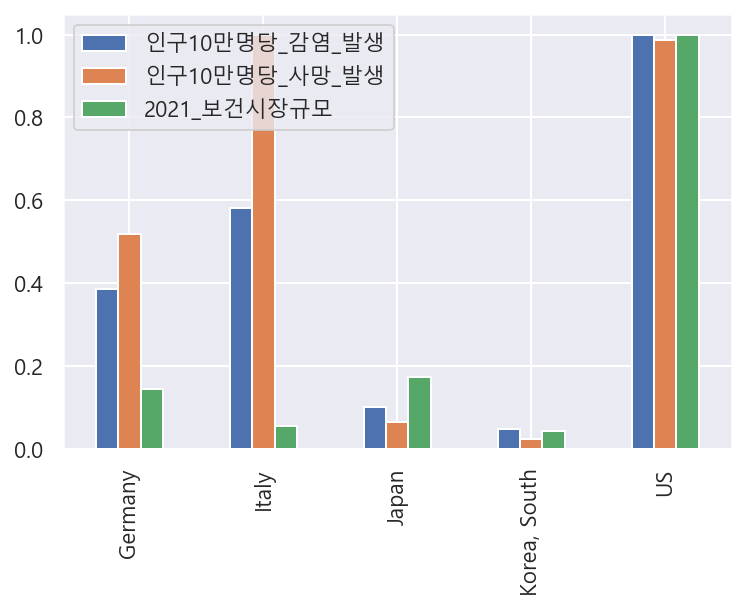

In [152]:
df_res_7[["인구10만명당_감염_발생", "인구10만명당_사망_발생", "2021_보건시장규모"]].plot.bar();

### 문제 7번에 대한 분석 결과
- 먼저, 보건산업통계청에서 세계 보건 산업 시장규모 데이터를 선정한 이유는, 의료 기술 발달에 가장 많은 영향을 주는 것은 실질적으로 시장 규모 확대에 따른 자금 지원이라 판단했습니다.
<br>

- 미국은 국방산업 등으로 세계 선진 국가 중에서도 선두를 달리는 국가 답게 2021년 보건시장규모(추정) 금액이 5개 국가중 가장 높습니다.
- 반면에, 대한민국은 의료 지원 사업이 다양하고 범위가 넓음에도 불구하고 5개 국가와 비교했을 때 가장 적은 시장 규모를 보이고 있습니다.
- 이는 절대적 국가 규모와 인구수 차이로 인한 국내총생산량 차이 때문에도 편차가 심하지만.
- 절대적 자금 지원력으로 미국, 독일, 일본이 대한민국과 이탈리아에 비해 의료 기술이 발달할 수 있는 가능성이 더 높습니다.
- 하지만, 오히려 시장규모가 클 수록 인구 10만명당 감염 또는 사망 발생 비율이 더 높다는 것을 알 수 있습니다.(이탈리아 제외)
- 결과적으로, 의료수준 대비 코로나 방역 대응과는 상관관계가 떨어지는 것으로 볼 수 있으며,
- 의료수준보다 방역 대응 정책 방안 수립에 대한 방향성을 보다 효과적으로 제시할 수 있는 정부 기관이 더욱 코로나 방역에 중요한 영향을 미칠 수 있다고 생각하게 되었습니다.
- 인구가 많을 수록 더욱 통제, 관리 방법이 체계적으로 제시 되어야 할 것입니다.
<br>

- 결론 : 이번 과제에서 분석 진행한 국가 중 대한민국은 코로나 방역 대응을 효과적으로 하고 있다고 판단 됩니다.